In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import tensorflow as tf
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [3]:
df=pd.read_csv('./kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv')
df.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [4]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [5]:
sentiment_count = Counter(df['label'])
print(sentiment_count)

Counter({1: 2505, 0: 2495})


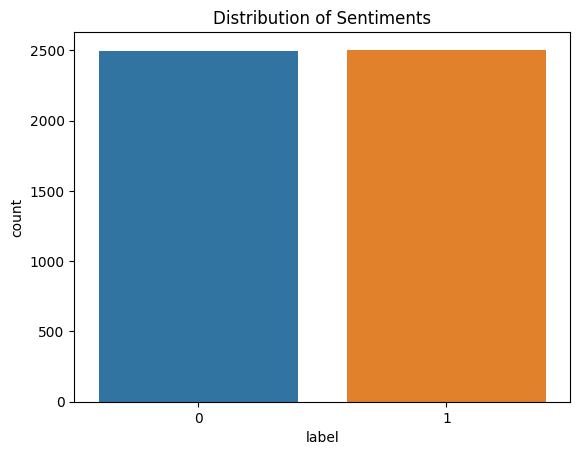

In [6]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Sentiments')
plt.show()

In [7]:
df['text_length'] = df['text'].apply(len)

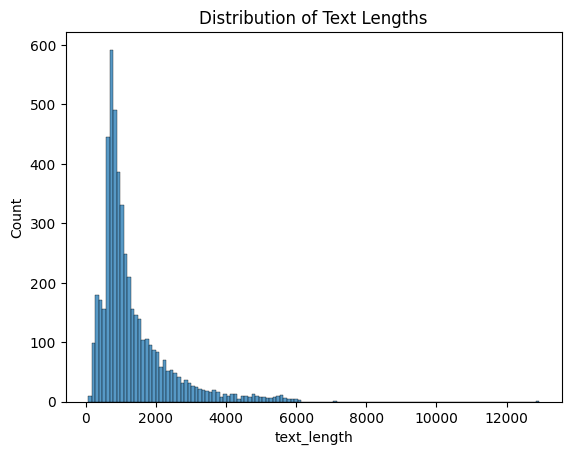

In [8]:
sns.histplot(x='text_length', data=df)
##plt.xlim(0, 2000)
plt.title('Distribution of Text Lengths')
plt.show()

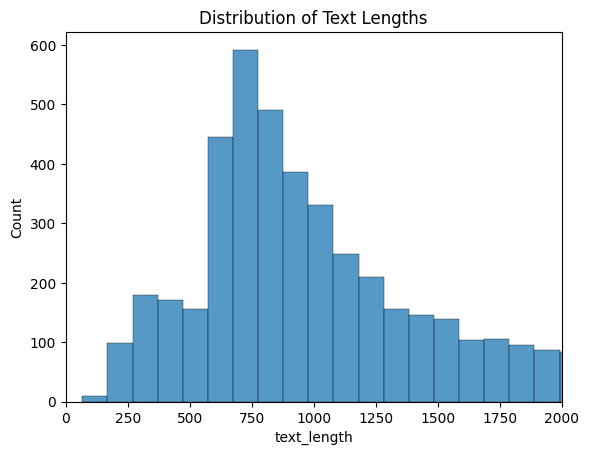

In [9]:
sns.histplot(x='text_length', data=df)
plt.xlim(0, 2000)
plt.title('Distribution of Text Lengths')
plt.show()

In [10]:
xmin = 0
xmax = 1500

# Boolean indexing to split the DataFrame
mask = (df['text'].apply(len) >= xmin) & (df['text'].apply(len) <= xmax)
df_range = df.loc[mask].copy()

In [11]:
df_range['text_length'] = df_range['text'].apply(len)

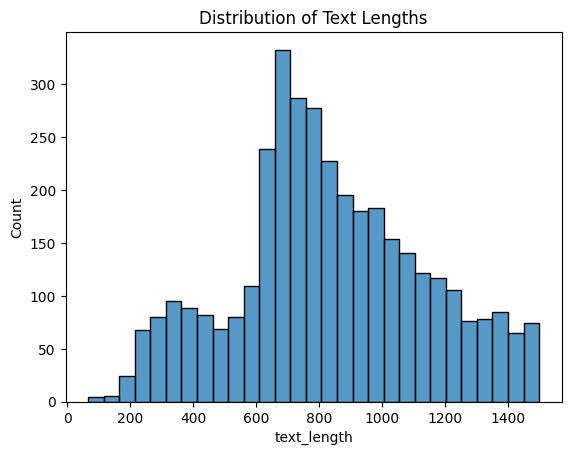

In [12]:
sns.histplot(x='text_length', data=df_range)
plt.title('Distribution of Text Lengths')
plt.show()

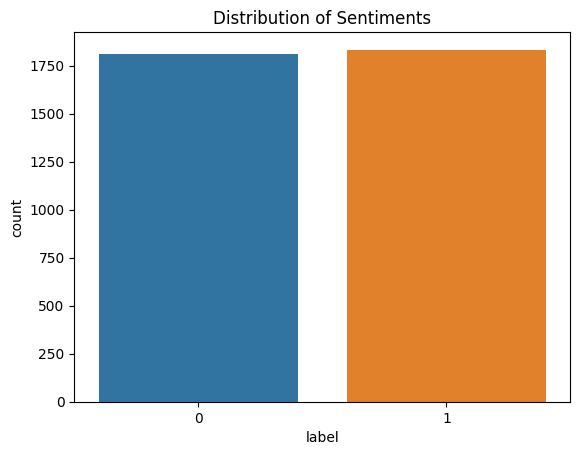

In [13]:
sns.countplot(x='label', data=df_range)
plt.title('Distribution of Sentiments')
plt.show()

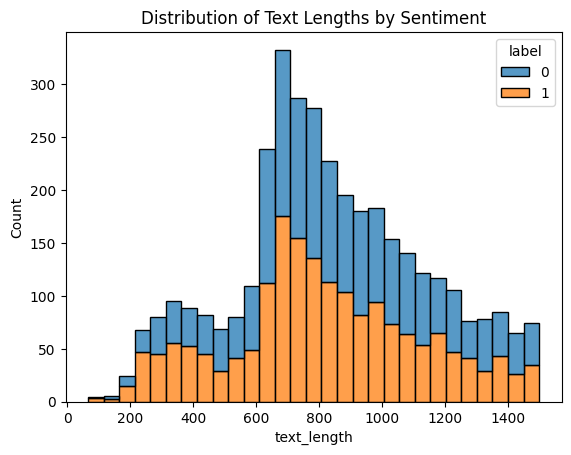

In [14]:
sns.histplot(x='text_length', data=df_range, hue='label', multiple='stack')
plt.title('Distribution of Text Lengths by Sentiment')
plt.show()

In [15]:
df_range['text'] = df_range['text'].apply(lambda x: re.sub(r'\W', ' ', str(x))) # remove non-alphanumeric characters

In [16]:
df_range['text'] = df_range['text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x)) # remove single character words

In [17]:
df_range['text'] = df_range['text'].apply(lambda x: re.sub(r'\^[a-zA-Z]\s+', ' ', x)) # remove single characters at the beginning of text

In [18]:
import pandas as pd
import re

# before replace multiple spaces with single space
df_before = df_range['text'].copy()
df_range['text'] = df_range['text'].apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I)) # replace multiple spaces with single space

# after replace multiple spaces with single space
df_after = df_range['text'].copy()

# view table
print("before replace multiple spaces with single space:")
print(df_before)
print("\nafter replace multiple spaces with single space:")
print(df_after)

before replace multiple spaces with single space:
1       1st watched 12 7 2002   3 out of 10 Dir Steve ...
2       This movie was so poorly written and directed ...
4       when first read about  berlin am meer didn exp...
6       I saw screening of this movie last night had h...
7       William Hurt may not be an American matinee id...
                              ...                        
4995    This is the kind of picture John Lassiter woul...
4996    A MUST SEE saw WHIPPED at press screening and ...
4997    NBC should be ashamed wouldn allow my children...
4998    This movie is clumsy mishmash of various ghost...
4999    Formula movie about the illegitimate son of ri...
Name: text, Length: 3646, dtype: object

after replace multiple spaces with single space:
1       1st watched 12 7 2002 3 out of 10 Dir Steve Pu...
2       This movie was so poorly written and directed ...
4       when first read about berlin am meer didn expe...
6       I saw screening of this movie last night

In [19]:
import pandas as pd
import re

# before convert to lowercase
df_before = df_range['text'].copy()
df_range['text'] = df_range['text'].apply(lambda x: x.lower()) # convert to lowercase

# after convert to lowercase
df_after = df_range.copy()

# Tampilkan tabel sebelum dan sesudah
print("before convert to lowercase:")
print(df_before)
print("\nafter convert to lowercase:")
print(df_after)

before convert to lowercase:
1       1st watched 12 7 2002 3 out of 10 Dir Steve Pu...
2       This movie was so poorly written and directed ...
4       when first read about berlin am meer didn expe...
6       I saw screening of this movie last night had h...
7       William Hurt may not be an American matinee id...
                              ...                        
4995    This is the kind of picture John Lassiter woul...
4996    A MUST SEE saw WHIPPED at press screening and ...
4997    NBC should be ashamed wouldn allow my children...
4998    This movie is clumsy mishmash of various ghost...
4999    Formula movie about the illegitimate son of ri...
Name: text, Length: 3646, dtype: object

after convert to lowercase:
                                                   text  label  text_length
1     1st watched 12 7 2002 3 out of 10 dir steve pu...      0         1070
2     this movie was so poorly written and directed ...      0         1402
4     when first read about berlin a

In [20]:
nlp = spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words
df_range['text_processed'] = df_range['text'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_stop and not token.is_punct]))

In [21]:
df_range.head()

,text,label,text_length,text_processed
1,1st watched 12 7 2002 3 out of 10 dir steve pu...,0,1070,1st watched 12 7 2002 3 10 dir steve purcell t...
2,this movie was so poorly written and directed ...,0,1402,movie poorly written directed fell asleep 30 m...
4,when first read about berlin am meer didn expe...,0,1013,read berlin meer didn expect thought right peo...
6,i saw screening of this movie last night had h...,0,1470,saw screening movie night high expectations go...
7,william hurt may not be an american matinee id...,1,955,william hurt american matinee idol anymore pre...


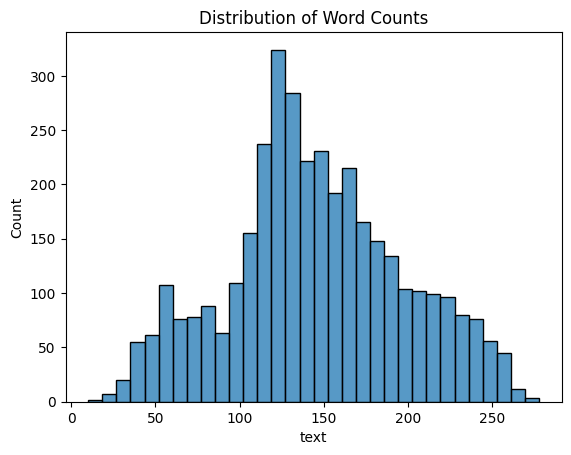

In [22]:
word_count = df_range['text'].apply(lambda x: len(x.split()))
sns.histplot(word_count)
plt.title('Distribution of Word Counts')
plt.show()

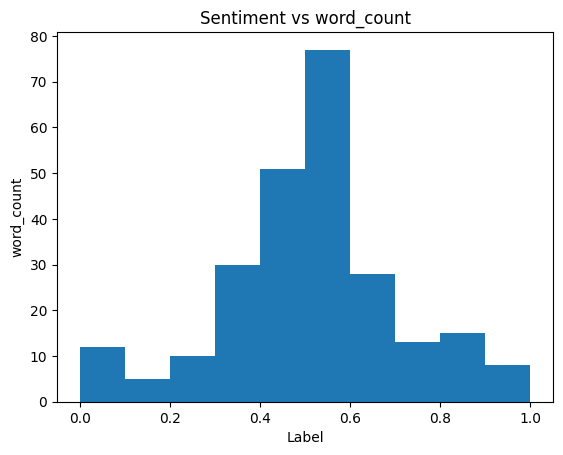

In [23]:
df_range['word_count'] = word_count
df_range.groupby('word_count')['label'].mean().plot.hist()
#plt.title('Sentiment Distribution by Word Count')
plt.ylabel('word_count')
#plt.xticks(rotation=90)
plt.xlabel('Label')
plt.title('Sentiment vs word_count')
plt.savefig('Sentiment vs word_count')
plt.show()
plt.show()

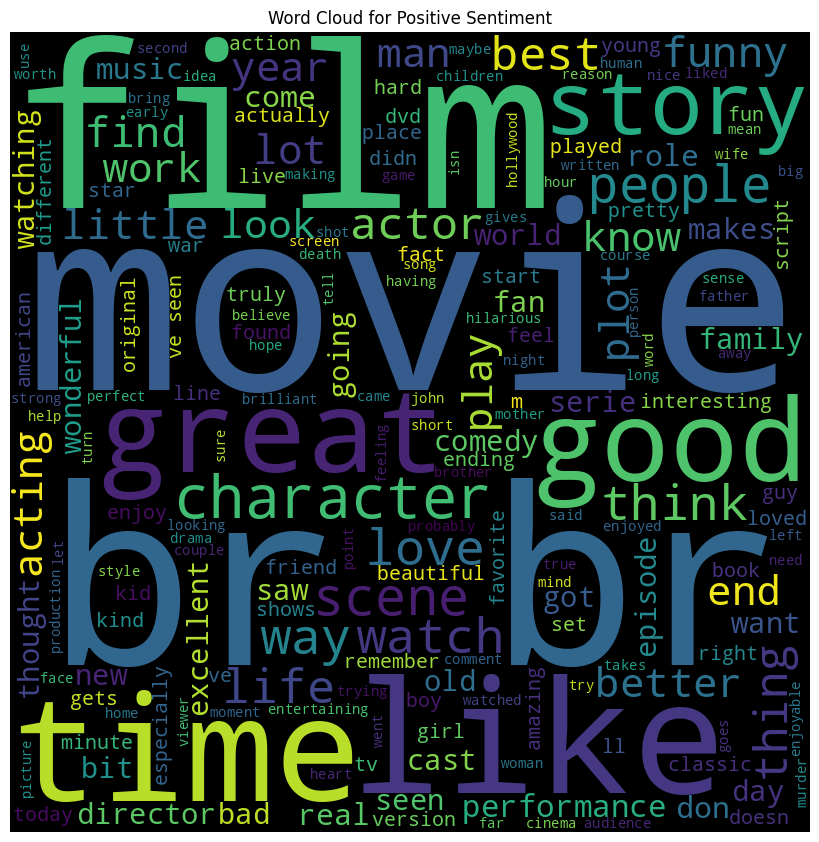

In [24]:
positive_texts = df_range[df_range['label'] == 1]['text_processed']
positive_wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=set()).generate(' '.join(positive_texts))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud for Positive Sentiment')
plt.show()

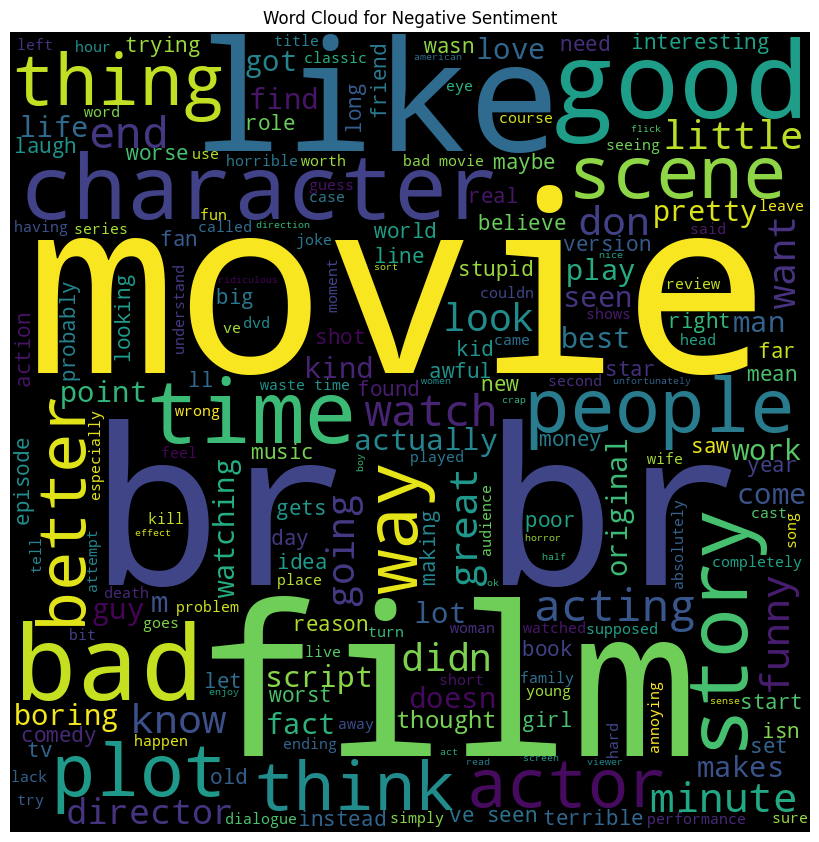

In [25]:
negative_texts = df_range[df_range['label'] == 0]['text_processed']
negative_wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=set()).generate(' '.join(negative_texts))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud for Negative Sentiment')
plt.show()

In [26]:
from nltk.corpus import stopwords

nltk.download('stopwords')
ps = PorterStemmer()
df_range['text'] = df_range['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in set(stopwords.words('english'))]))
df_range['text_processed'] = df_range['text_processed'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in set(stopwords.words('english'))]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
#randomization
df_range = df_range.sample(frac=1).reset_index(drop=True)
df_range.head()

,text,label,text_length,text_processed,word_count
0,victor nunez imbu unsentiment tale young woman...,1,800,victor nunez imbu unsentiment tale young woman...,143
1,must seen differ version first person user com...,1,705,seen differ version person user comment sectio...,123
2,saw reader film festiv manhattan week touch he...,1,836,saw reader film festiv manhattan week touch he...,142
3,documentari uniqu subject amato stapl erotica ...,1,1141,documentari uniqu subject amato stapl erotica ...,202
4,seen 4 instal one far best nt much expect got ...,1,235,seen 4 instal far best nt expect got dvd 3rd d...,46


In [28]:
accuracy = {'TF-IDF': []}

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Contoh data teks dan label
X = df_range['text']
y = df_range['label']

# Vektorisasi teks menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Bagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_acc}")


SVM Accuracy: 0.8547945205479452


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

train_size = int(len(df_range) * 0.8)
train_data = df_range[:train_size]
test_data = df_range[train_size:]

tfidf = TfidfVectorizer()
tfidf.fit(train_data['text'])
X_train = tfidf.transform(train_data['text'])
X_test = tfidf.transform(test_data['text'])

# Membuat model SVM
svm_model = SVC()

# Tentukan hyperparameters yang ingin di-tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

# Buat objek GridSearchCV untuk mencari kombinasi hyperparameter terbaik
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, train_data['label'])

# Dapatkan kombinasi hyperparameter terbaik dari GridSearch
best_params = grid_search.best_params_

# Buat model SVM dengan kombinasi hyperparameter terbaik
svm_model = SVC(**best_params)
svm_model.fit(X_train, train_data['label'])

# Evaluasi akurasi pada data uji
svm_acc = svm_model.score(X_test, test_data['label'])
accuracy['TF-IDF'].append(svm_acc)

print(f"SVM Accuracy: {svm_acc}")


SVM Accuracy: 0.8602739726027397
